# Time Series Prediction with LSTM Recurrent Neural Networks in Python with Keras

In [ ]:
## Import Packages

In [2]:
import pandas
import matplotlib.pyplot as plt
import numpy
import matplotlib.pyplot as plt
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## Explore Dataset

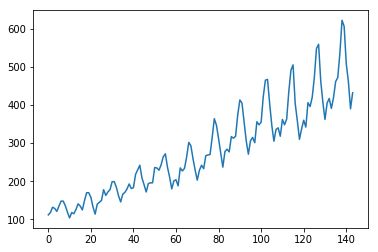

In [3]:
dataset = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

## Fix random seed for reproducibility

In [4]:
numpy.random.seed(7)

## Load Dataset

In [5]:
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

## Normalize the dataset

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

## Split into train and test sets

In [7]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


## Convert an array of values into a dataset matrix

In [8]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [11]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [12]:
trainX.shape

(94, 1)

In [13]:
# reshape input to be [samples, time steps, features] -> This is the required input dimensions for the LSTM.
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [14]:
trainX.shape

(94, 1, 1)

## Create and fit the LSTM network

In [15]:
model1 = Sequential()
model1.add(LSTM(4, input_shape=(1, look_back)))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error', optimizer='adam')
model1.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 1s - loss: 0.0434
Epoch 2/100
 - 0s - loss: 0.0218
Epoch 3/100
 - 0s - loss: 0.0159
Epoch 4/100
 - 0s - loss: 0.0144
Epoch 5/100
 - 0s - loss: 0.0136
Epoch 6/100
 - 0s - loss: 0.0127
Epoch 7/100
 - 0s - loss: 0.0119
Epoch 8/100
 - 0s - loss: 0.0112
Epoch 9/100
 - 0s - loss: 0.0104
Epoch 10/100
 - 1s - loss: 0.0095
Epoch 11/100
 - 0s - loss: 0.0086
Epoch 12/100
 - 0s - loss: 0.0077
Epoch 13/100
 - 0s - loss: 0.0069
Epoch 14/100
 - 0s - loss: 0.0062
Epoch 15/100
 - 1s - loss: 0.0054
Epoch 16/100
 - 0s - loss: 0.0047
Epoch 17/100
 - 0s - loss: 0.0041
Epoch 18/100
 - 0s - loss: 0.0036
Epoch 19/100
 - 0s - loss: 0.0032
Epoch 20/100
 - 0s - loss: 0.0028
Epoch 21/100
 - 0s - loss: 0.0026
Epoch 22/100
 - 0s - loss: 0.0024
Epoch 23/100
 - 0s - loss: 0.0022
Epoch 24/100
 - 1s - loss: 0.0022
Epoch 25/100
 - 0s - loss: 0.0021
Epoch 26/100
 - 0s - loss: 0.0022
Epoch 27/100
 - 0s - loss: 0.0021
Epoch 28/100
 - 0s - loss: 0.0021
Epoch 29/100
 - 0s - loss: 0.0021
Epoch 30/100
 - 0s - lo

## Test the model

In [17]:
# make predictions (Model inference)
trainPredict = model1.predict(trainX)
testPredict = model1.predict(testX)

In [18]:
# invert predictions(finding actual values.not normalized)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.81 RMSE
Test Score: 47.76 RMSE


## Plot Results

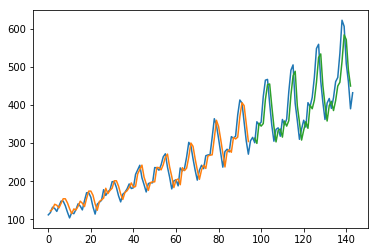

In [19]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Window Method (Lookback = 3)

In [20]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [21]:
trainX.shape

(92, 3)

In [22]:
# reshape input to be [samples, time steps, features] -> This is the required input dimensions for the LSTM.
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [23]:
trainX.shape

(92, 1, 3)

## Create and fit the LSTM network

In [20]:
model2 = Sequential()
model2.add(LSTM(4, input_shape=(1, look_back)))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam')
model2.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 1s - loss: 0.0274
Epoch 2/100
 - 0s - loss: 0.0098
Epoch 3/100
 - 0s - loss: 0.0077
Epoch 4/100
 - 0s - loss: 0.0068
Epoch 5/100
 - 0s - loss: 0.0059
Epoch 6/100
 - 0s - loss: 0.0051
Epoch 7/100
 - 0s - loss: 0.0046
Epoch 8/100
 - 0s - loss: 0.0042
Epoch 9/100
 - 0s - loss: 0.0039
Epoch 10/100
 - 0s - loss: 0.0038
Epoch 11/100
 - 0s - loss: 0.0034
Epoch 12/100
 - 0s - loss: 0.0034
Epoch 13/100
 - 0s - loss: 0.0034
Epoch 14/100
 - 0s - loss: 0.0032
Epoch 15/100
 - 0s - loss: 0.0032
Epoch 16/100
 - 0s - loss: 0.0031
Epoch 17/100
 - 0s - loss: 0.0031
Epoch 18/100
 - 0s - loss: 0.0032
Epoch 19/100
 - 0s - loss: 0.0031
Epoch 20/100
 - 0s - loss: 0.0031
Epoch 21/100
 - 0s - loss: 0.0030
Epoch 22/100
 - 0s - loss: 0.0030
Epoch 23/100
 - 0s - loss: 0.0029
Epoch 24/100
 - 0s - loss: 0.0029
Epoch 25/100
 - 0s - loss: 0.0030
Epoch 26/100
 - 0s - loss: 0.0029
Epoch 27/100
 - 0s - loss: 0.0029
Epoch 28/100
 - 0s - loss: 0.0028
Epoch 29/100
 - 0s - loss: 0.0028
Epoch 30/100
 - 0s - lo

## Test the model

In [21]:
# make predictions (Model inference)
trainPredict = model2.predict(trainX)
testPredict = model2.predict(testX)

In [22]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.99 RMSE
Test Score: 54.70 RMSE


## Plot Results

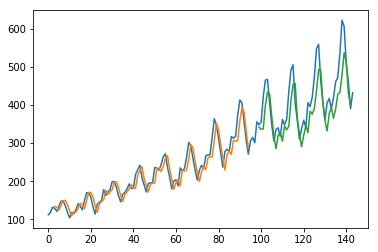

In [23]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Time Step Method (timestep = 3)

In [24]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [25]:
trainX.shape

(92, 3)

In [26]:
# reshape input to be [samples, time steps, features] -> This is the required input dimensions for the LSTM.
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [27]:
trainX.shape

(92, 3, 1)

## Create and fit the LSTM network

In [28]:
model3 = Sequential()
model3.add(LSTM(4, input_shape=(look_back, 1)))
model3.add(Dense(1))
model3.compile(loss='mean_squared_error', optimizer='adam')
model3.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 1s - loss: 0.0480
Epoch 2/100
 - 0s - loss: 0.0175
Epoch 3/100
 - 0s - loss: 0.0143
Epoch 4/100
 - 0s - loss: 0.0124
Epoch 5/100
 - 0s - loss: 0.0107
Epoch 6/100
 - 0s - loss: 0.0093
Epoch 7/100
 - 0s - loss: 0.0079
Epoch 8/100
 - 0s - loss: 0.0068
Epoch 9/100
 - 1s - loss: 0.0059
Epoch 10/100
 - 1s - loss: 0.0052
Epoch 11/100
 - 1s - loss: 0.0049
Epoch 12/100
 - 1s - loss: 0.0044
Epoch 13/100
 - 1s - loss: 0.0042
Epoch 14/100
 - 1s - loss: 0.0040
Epoch 15/100
 - 1s - loss: 0.0039
Epoch 16/100
 - 1s - loss: 0.0039
Epoch 17/100
 - 1s - loss: 0.0038
Epoch 18/100
 - 1s - loss: 0.0038
Epoch 19/100
 - 1s - loss: 0.0038
Epoch 20/100
 - 1s - loss: 0.0038
Epoch 21/100
 - 2s - loss: 0.0037
Epoch 22/100
 - 1s - loss: 0.0037
Epoch 23/100
 - 1s - loss: 0.0039
Epoch 24/100
 - 1s - loss: 0.0037
Epoch 25/100
 - 1s - loss: 0.0036
Epoch 26/100
 - 2s - loss: 0.0036
Epoch 27/100
 - 1s - loss: 0.0037
Epoch 28/100
 - 1s - loss: 0.0037
Epoch 29/100
 - 1s - loss: 0.0036
Epoch 30/100
 - 1s - lo

## Test the model

In [29]:
# make predictions (Model inference)
trainPredict = model3.predict(trainX)
testPredict = model3.predict(testX)

In [30]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.95 RMSE
Test Score: 52.36 RMSE


## Plot Results

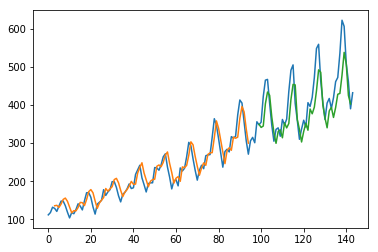

In [31]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()